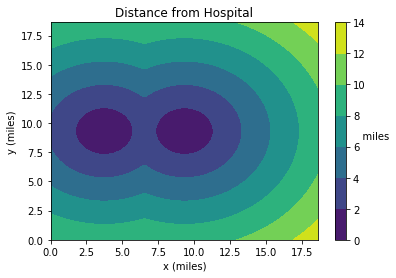

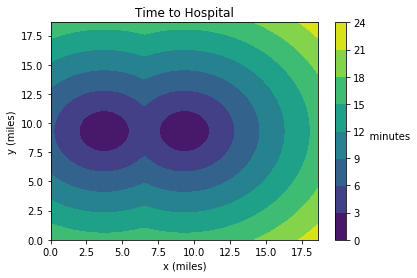

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math

scale = 18.64
xCSC = .5 * scale ; yCSC = .5 * scale
xPSC = .2 * scale ; yPSC = .5 * scale
def distHospital(X,Y, xCSC, yCSC):
    xCSC = np.full(shape = 100, fill_value = xCSC) ; yCSC = np.full(shape = 100, fill_value = yCSC) 
    return(np.hypot(X - xCSC, Y - yCSC))

# xCSC = np.full(shape = 100, fill_value = xCSC) ; yCSC = np.full(shape = 100, fill_value = yCSC) 
# print(xCSC)

# self.distFromCSC = math.hypot(xCSC - self.xLocation, yCSC - self.yLocation) # * scale_distance
# self.distFromPSC = math.hypot(xPSC - self.xLocation, yPSC - self.yLocation) # * scale_distance
# self.distFromPSC2 = math.hypot(xPSC2 - self.xLocation, yPSC2 - self.yLocation)
# def distFromHospital(xlocation,ylocation, X, Y):
#     return

xlist = np.linspace(0, 18.64, 100)
ylist = np.linspace(0, 18.64, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = np.sqrt(X**2 + Y**2)
Z2 =  np.minimum(distHospital(X,Y,xCSC,yCSC), distHospital(X,Y,xPSC,yPSC))#np.hypot(X - xCSC, Y - yCSC)
fig,ax=plt.subplots(1,1)

cp = ax.contourf(X, Y, Z2)
bar = fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Distance from Hospital')
ax.set_xlabel('x (miles)')
ax.set_ylabel('y (miles)')
bar.set_label("    miles", rotation = 'horizontal')
plt.show()

Z3 =  np.minimum(distHospital(X,Y,xCSC,yCSC), distHospital(X,Y,xPSC,yPSC)) * 60/35
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z3)

bar = fig.colorbar(cp) # Add a colorbar to a plot
bar.set_label("             minutes", rotation = 'horizontal')
ax.set_title('Time to Hospital')
ax.set_xlabel('x (miles)')
ax.set_ylabel('y (miles)')

plt.show()

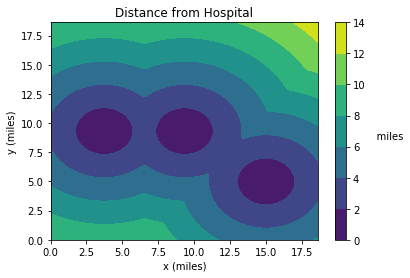

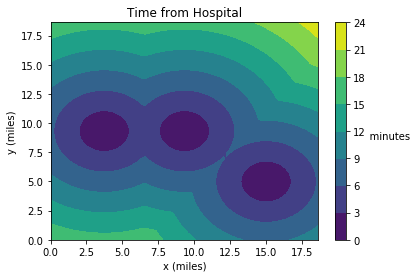

In [9]:
scale = 18.64
xCSC = .5 * scale ; yCSC = .5 * scale
xPSC = .2 * scale ; yPSC = .5 * scale
xPSC2 = 15; yPSC2 = 5

########################## distance to hospital
xlist = np.linspace(0, 18.64, 100)
ylist = np.linspace(0, 18.64, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = np.sqrt(X**2 + Y**2)
Z2 = np.minimum(distHospital(X,Y,xCSC,yCSC), np.minimum(distHospital(X,Y,xPSC,yPSC), distHospital(X,Y,xPSC2,yPSC2)))
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z2)
bar = fig.colorbar(cp) # Add a colorbar to a plot
bar.set_label("             miles", rotation = 'horizontal')
ax.set_title('Distance from Hospital')
ax.set_xlabel('x (miles)')
ax.set_ylabel('y (miles)')
plt.savefig(fname = 'distance_from.jpg', bbox_inches = 'tight')
plt.show()
################### time to hospital
xlist = np.linspace(0, 18.64, 100)
ylist = np.linspace(0, 18.64, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = np.sqrt(X**2 + Y**2)
Z2 = np.minimum(distHospital(X,Y,xCSC,yCSC), np.minimum(distHospital(X,Y,xPSC,yPSC), distHospital(X,Y,xPSC2,yPSC2))) * 60/35
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z2)
bar = fig.colorbar(cp) # Add a colorbar to a plot
bar.set_label("             minutes", rotation = 'horizontal')
ax.set_title('Time from Hospital')
ax.set_xlabel('x (miles)')
ax.set_ylabel('y (miles)')
plt.savefig(fname = 'time_from.jpg', bbox_inches = 'tight')
plt.show()


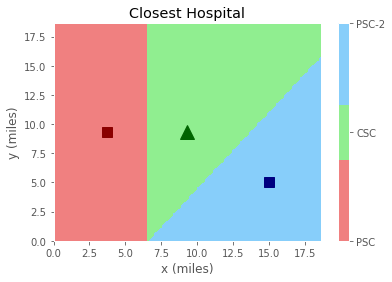

In [10]:
scale = 18.64
xCSC = .5 * scale ; yCSC = .5 * scale
xPSC = .2 * scale ; yPSC = .5 * scale
xPSC2 = 15; yPSC2 = 5
a = distHospital(X,Y,xCSC,yCSC)
b = distHospital(X,Y,xPSC,yPSC)
c = distHospital(X,Y,xPSC2,yPSC2)

xlist = np.linspace(0, 18.64, 100)
ylist = np.linspace(0, 18.64, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = np.sqrt(X**2 + Y**2)
closest = np.full(fill_value = 0, shape = (100,100))


######### closest is CSC
# if (a < b) & (a < c):
closest[((a < b) & (a < c))] = 1
###########closest is PSC2
# if (c < b) & (a > c):
closest[(c < b) & (a > c)] = 2   
########### closest is PSC
# if (c > b) & (a > b):
closest[(c > b) & (a > b)] = 0   
    
Z2 =  np.minimum(distHospital(X,Y,xCSC,yCSC), np.minimum(distHospital(X,Y,xPSC,yPSC), distHospital(X,Y,xPSC2,yPSC2)))
# fig,ax=plt.subplots(1,1)
# cp = ax.contourf(X, Y, closest)
# fig.colorbar(cp) # Add a colorbar to a plot
# ax.set_title('Closest Hospital')
# #ax.set_xlabel('x (cm)')
# ax.set_ylabel('y (miles)')
# plt.show()

######################################################### good map
colors = ['lightcoral','lightgreen','lightskyblue']
hospitals = ['PSC', 'CSC', 'PSC-2']

#fig = plt.figure(figsize=(10,8))
#plt.scatter(X, Y, c=closest, cmap=matplotlib.colors.ListedColormap(colors))
plt.style.use("ggplot")
fig,ax=plt.subplots(1,1)

cp = ax.contourf(X,Y,closest, cmap = matplotlib.colors.ListedColormap(colors))
ax.set_ylabel('y (miles)')
ax.set_xlabel('x (miles)')
ax.set_title('Closest Hospital')
cb = plt.colorbar(cp)
loc = np.arange(0,3)
cb.set_ticks(loc)
cb.set_ticklabels(hospitals)

aug1 = plt.plot(xCSC,yCSC, 'or', marker = "^", markersize = "14", label = "CSC", color = 'darkgreen')
aug2 = plt.plot(xPSC,yPSC, 'or', marker = "s", markersize = "10", label = "PSC",color = 'darkred')
aug2 = plt.plot(xPSC2,yPSC2, 'or', marker = "s", markersize = "10", label = "PSC",color = 'navy')
plt.savefig(fname = 'closest_hospital.jpg', bbox_inches = 'tight')
plt.show()


{1}


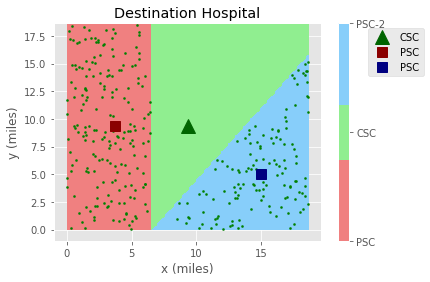

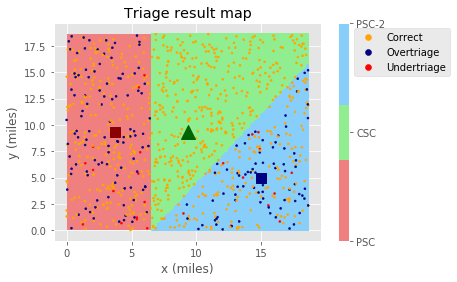

In [12]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import matplotlib
# path = 'C:/Users/eliot421/Desktop/stroke research/model_output/'
# data = pd.read_csv(path + "test2psc.csv")
path = 'C:/Users/eliot421/Desktop/stroke research/Model/'
data = pd.read_csv(path + "2psc_1.csv")
two_psc = False
if (len(set(data['destination'])) > 2):
    two_psc = True

################# prep the data
data = data.assign(colors = lambda dat: dat['destination'].map(lambda dest: 0 if dest =='PSC' else (1 if dest == "CSC" else 2)),
                  colors2 = lambda dat: dat['result'].map(lambda result: 0 if result =='correct' else(1 if result == "overtriage" else 2)))
irreg = data[data.destination != data.closest_hospital]
print(set(irreg.colors))
################## first the colors
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X,Y,closest, cmap = matplotlib.colors.ListedColormap(colors))
ax.set_ylabel('y (miles)')
ax.set_xlabel('x (miles)')
ax.set_title('Destination Hospital')
cb = plt.colorbar(cp)
loc = np.arange(0,3)
cb.set_ticks(loc)
cb.set_ticklabels(hospitals)

aug1 = plt.plot(xCSC,yCSC, 'or', marker = "^", markersize = "14", label = "CSC", color = 'darkgreen')
aug2 = plt.plot(xPSC,yPSC, 'or', marker = "s", markersize = "10", label = "PSC",color = 'darkred')
aug3 = plt.plot(xPSC2,yPSC2, 'or', marker = "s", markersize = "10", label = "PSC",color = 'navy')
##################### scatter plot
color2 = ["red",'green','blue']

scat = plt.scatter(irreg['xLocation'], y = irreg['yLocation'], c = 'green', s = 4)
leg = plt.legend(bbox_to_anchor = (1.4,1), loc = 0)
#leg.get_texts()[3].set_text('CSC Patient')
plt.savefig(fname = 'destination_map.jpg', bbox_inches = 'tight')
plt.show()

######################### plot of outcomes
fig,ax=plt.subplots(1,1)
plt.style.use("ggplot")

cp = ax.contourf(X,Y,closest, cmap = matplotlib.colors.ListedColormap(colors))
ax.set_ylabel('y (miles)')
ax.set_xlabel('x (miles)')
ax.set_title('Triage result map')
cb = plt.colorbar(cp)
loc = np.arange(0,3)
cb.set_ticks(loc)
cb.set_ticklabels(hospitals)

aug1 = plt.plot(xCSC,yCSC, 'or', marker = "^", markersize = "14", label = "CSC", color = 'darkgreen')
aug2 = plt.plot(xPSC,yPSC, 'or', marker = "s", markersize = "10", label = "PSC",color = 'darkred')
aug3 = plt.plot(xPSC2,yPSC2, 'or', marker = "s", markersize = "10", label = "PSC",color = 'navy')
##################### scatter plot
color4 = ["orange",'navy','red']

scat = plt.scatter('xLocation', y = 'yLocation', c = 'colors2', data = data[(data.hasLVO != data.LVO_diagnosis) | (data.hasLVO == True)], 
                  cmap = matplotlib.colors.ListedColormap(color4),  s = 4)
handles, labels = scat.legend_elements()
leg = ax.legend(handles, ["Correct","Overtriage","Undertriage"], bbox_to_anchor = (1.5,1), loc = 0)

plt.savefig(fname = 'result_map.jpg', bbox_inches = 'tight')
plt.show()



In [16]:
#data[(data.LVO != data.LVO_diagnosis) | (data.LVO == 1)]
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [ ]:
fig,ax=plt.subplots(1,1)
plt.style.use("ggplot")

data2 = data[(data.LVO != data.LVO_diagnosis) | (data.LVO == 1)]
groups = data.groupby('')

cp = ax.contourf(X,Y,closest, cmap = matplotlib.colors.ListedColormap(colors))
ax.set_ylabel('y (miles)')
ax.set_xlabel('x (miles)')
ax.set_title('Destination Hospital')
cb = plt.colorbar(cp)
loc = np.arange(0,3)
cb.set_ticks(loc)
cb.set_ticklabels(hospitals)

aug1 = plt.plot(xCSC,yCSC, 'or', marker = "^", markersize = "14", label = "CSC", color = 'darkgreen')
aug2 = plt.plot(xPSC,yPSC, 'or', marker = "s", markersize = "10", label = "PSC",color = 'darkred')
aug3 = plt.plot(xPSC2,yPSC2, 'or', marker = "s", markersize = "10", label = "PSC",color = 'navy')
##################### scatter plot
color4 = ["orange",'navy','red']

scat = plt.scatter('xLocation', y = 'yLocation', c = 'colors2', data = data[(data.LVO != data.LVO_diagnosis) | (data.LVO == 1)], 
                  cmap = matplotlib.colors.ListedColormap(color4),  s = 4)
handles, labels = scat.legend_elements()
leg = ax.legend(handles, ["Correct","Overtriage","Undertriage"], bbox_to_anchor = (1.5,1), loc = 0)


plt.show()

In [6]:
# data2 = data[(data.LVO != data.LVO_diagnosis) | (data.LVO == 1)]
# groups = data.groupby('triage_result')
# for group in groups:
#     print(group[1].xLocation)
    
    
data[(data.nearest_hospital == "PSC-2")]

,patientID,xLocation,yLocation,Stroke,LVO,LVO_diagnosis,ischemic,hemorrhage,Last_well,ems2Scene,...,time2PSC,time2CSC,time2PSC2,nearest_hospital,destination,triage_result,total_time,rep_no,colors,colors2
0,1,16.709430,7.285274,0,0,0.0,0,0,28.211464,8.480894,...,13.139925,7.664449,2.853879,PSC-2,PSC-2,good,13.024433,1,2,0
1,2,10.102116,2.130446,1,0,0.0,1,0,0.159760,9.522259,...,9.608280,7.231970,5.676584,PSC-2,PSC-2,good,18.727347,1,2,0
2,3,18.571906,5.788133,1,0,0.0,1,0,0.725234,13.028845,...,15.258297,9.903123,3.657822,PSC-2,PSC-2,good,44.024722,1,2,0
6,7,16.384003,2.651990,0,0,1.0,0,0,9.685929,10.435367,...,14.305131,9.714037,2.725549,PSC-2,PSC-2,good,24.449171,1,2,0
16,17,12.680422,3.815726,1,1,1.0,1,0,29.028403,1.000000,...,10.509181,6.448989,2.604409,PSC-2,PSC-2,good,10.603584,1,2,0
19,20,15.047705,4.120445,0,0,0.0,0,0,18.309728,14.829969,...,12.456769,7.735760,0.880847,PSC-2,PSC-2,good,26.135023,1,2,0
20,21,10.535885,3.348427,0,0,0.0,0,0,0.055362,10.286048,...,9.055771,6.094101,4.759833,PSC-2,PSC-2,good,35.107534,1,2,0
23,24,13.163810,3.661381,0,0,1.0,0,0,15.477415,20.366444,...,11.002476,6.840676,2.272333,PSC-2,PSC-2,good,34.124663,1,2,0
24,25,18.299949,11.837539,1,0,1.0,1,0,2.236524,29.657441,...,14.787823,9.326172,7.592207,PSC-2,CSC,over,51.689613,1,1,1
26,27,11.772378,2.701728,0,0,0.0,0,0,5.148739,12.000145,...,10.416984,7.058023,3.962272,PSC-2,PSC-2,good,35.312843,1,2,0
